# 第11章　季節性とマクロ変数を加える?
## 11.3 季節性の具体例

In [14]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as web
import numpy as np
end='2016/9/30'
n225 = web.DataReader("NIKKEI225", 'fred',"1949/5/16",end).dropna()
develop=n225.loc[:'1989/12/31']
reform=n225.loc['1989/12/31':]
year=n225.loc['1989']
years=[x+1950 for x in range(66)]
m=lambda x:x.month
count=[0]*12
alpha=0.1
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[24, 15, 14, 9, 14, 10, 9, 14, 16, 9, 14, 15]


In [2]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
alpha=0.1
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0 and years[i]>=1990:
            count[j]+=1
print(count)
print(t0)

[2, 3, 2, 2, 4, 2, 2, 1, 5, 1, 3, 4]
1.36343031802


In [3]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[24, 15, 14, 9, 14, 10, 9, 14, 16, 9, 14, 15]


In [4]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])<t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[2, 5, 5, 2, 9, 4, 6, 6, 5, 4, 7, 3]


In [5]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])<t0 and years[i]>=1990:
            count[j]+=1
print(count)

[1, 2, 2, 0, 4, 2, 2, 2, 3, 0, 3, 1]


In [6]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])>t0:
            count[j]+=1
print(count)

[15, 17, 14, 13, 10]


In [7]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])>t0 and years[j]>1990:
            count[j]+=1
print(count)

[0, 0, 0, 0, 0]


In [8]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])<t0:
            count[j]+=1
print(count)

[7, 10, 5, 3, 7]


In [9]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])<t0 and years[j]>1990:
            count[j]+=1
print(count)

[0, 0, 0, 0, 0]


## 11.4 マクロ変数との関係(単回帰と多変量解析)

In [15]:
import pandas_datareader.data as pdr
import numpy as np
start='1971/12/1'
end='2016/8/31'
workpop = web.DataReader('LFWA64TTJPM647S',"fred",start,end).dropna()
gdp = web.DataReader('MKTGDPJPA646NWDB',"fred",start,end).dropna()
gdp=gdp.resample('A',loffset='-1d').last().dropna()
fx = web.DataReader('DEXJPUS',"fred",start,end).dropna()
fx=fx.resample('A',loffset='-1d').last().dropna()
workpop=workpop['1972':].resample('A',loffset='-1d').last().dropna()
gdpjpy=gdp.MKTGDPJPA646NWDB*fx.DEXJPUS
gdpjpy=np.log(gdpjpy).dropna()
workpop=np.log(workpop).dropna()

In [18]:
import statsmodels.api as sm
x=sm.add_constant(gdpjpy)
model=sm.OLS(gdpjpy,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.651e+26
Date:                Sun, 02 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:28:05   Log-Likelihood:                 1215.8
No. Observations:                  44   AIC:                            -2428.
Df Residuals:                      42   BIC:                            -2424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.918e-13   2.61e-12      0.074      0.9

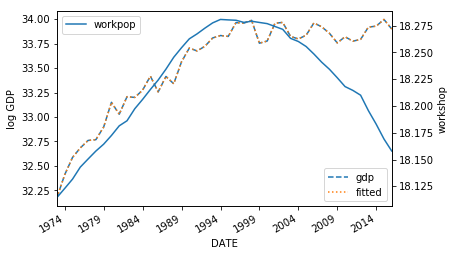

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
f,ax = plt.subplots()#２軸のグラフの準備
ax.plot(gdpjpy,label='gdp',linestyle="--")
ax2=ax.twinx()#２軸目をax2として設定
ax2.plot((workpop),label='workpop')#２軸目にプロット
results.fittedvalues.plot(label='fitted',style=':',ax=ax)
ax.set_ylabel('log GDP')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

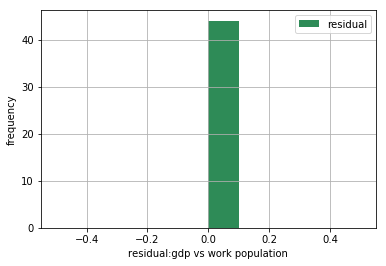

In [20]:
import matplotlib.pyplot as plt
results.resid.hist(label='residual',color='seagreen')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [21]:
import pandas as pd
lnn225 = np.log(pdr.DataReader("NIKKEI225", 'fred',start,end).dropna())
lnn225=lnn225.resample('A',loffset='-1d').last().dropna()
port=pd.concat([lnn225,x,gdpjpy],axis=1).dropna()
port.columns=["n225","const","workpop","gdpjpy"]
model=sm.OLS(port.n225,port.ix[0:,['const','workpop','gdpjpy']])
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     49.40
Date:                Sun, 02 Jul 2017   Prob (F-statistic):           1.32e-08
Time:                        23:28:29   Log-Likelihood:                -19.004
No. Observations:                  44   AIC:                             42.01
Df Residuals:                      42   BIC:                             45.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.9123      4.026     -4.698      0.0

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


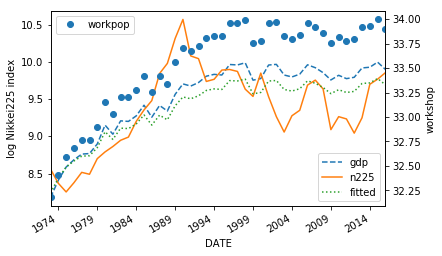

In [22]:
#多変量解析：折れ線グラフ
f,ax = plt.subplots()#２軸のグラフの準備
(port.gdpjpy-24).plot(label='gdp',linestyle="--",ax=ax)
port.n225.plot(label='n225',ax=ax)
ax2=ax.twinx()#２軸目をax2として設定
(port.workpop).plot(label='workpop',ax=ax2,style='o')
results.fittedvalues.plot(label='fitted',style=':',ax=ax)
plt.legend(loc='upper left')
ax.set_ylabel('log Nikkei225 index')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

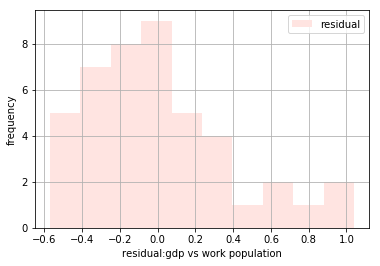

In [23]:
#多変量解析：ヒストグラム
results.resid.hist(label='residual',color='mistyrose')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [41]:
#バブル崩壊前
port_b=port[:'1990/1/1']
model_b=sm.OLS(port_b.n225,port_b.iloc[0:,1:])
results_b=model_b.fit()
print(results_b.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     46.92
Date:                Sun, 02 Jul 2017   Prob (F-statistic):           3.91e-06
Time:                        23:32:30   Log-Likelihood:                -6.2581
No. Observations:                  18   AIC:                             16.52
Df Residuals:                      16   BIC:                             18.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.2435      7.057     -5.561      0.0

C:\Users\moriya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


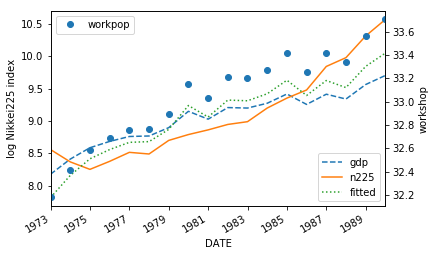

In [25]:
#バブル崩壊前のグラフ
f,ax = plt.subplots()#２軸のグラフの準備
(port[:'1990/1/1'].gdpjpy-24).plot(label='gdp',linestyle="--",ax=ax)
port[:'1990/1/1'].n225.plot(label='n225',ax=ax)
ax2=ax.twinx()#２軸目をax2として設定
(port[:'1990/1/1'].workpop).plot(label='workpop',style='o',ax=ax2)
#書籍のグラフはworkpopから8.5引いてしまっているので、こちらが正しいグラフです。
results_b.fittedvalues.plot(label='fitted',style=':',ax=ax)
ax.set_ylabel('log Nikkei225 index')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

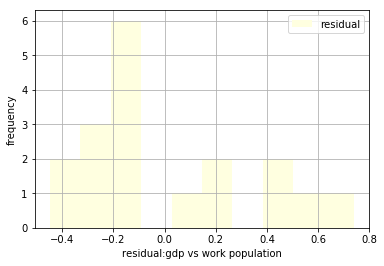

In [26]:
#バブル崩壊前：ヒストグラム
results_b.resid.hist(label='residual',color='lightyellow')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [42]:
#バブル崩壊後
port_a=port['1990/1/1':]
results_a=(sm.OLS(port_a.n225,port_a.iloc[0:,1:])).fit()
print(results_a.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.1232
Date:                Sun, 02 Jul 2017   Prob (F-statistic):              0.729
Time:                        23:33:03   Log-Likelihood:                -6.0185
No. Observations:                  26   AIC:                             16.04
Df Residuals:                      24   BIC:                             18.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2689     23.679      0.054      0.9

In [43]:
import pandas as pd
lnn225 = np.log(pdr.DataReader("NIKKEI225", 'fred',start,end).dropna())
lnn225=lnn225.resample('A',loffset='-1d').last().dropna()
lnfx=np.log(fx)
port1=pd.concat([lnn225,x,gdpjpy,lnfx],axis=1).dropna()
port1.columns=["n225","const","workpop","gdpjpy","fx"]
model1=sm.OLS(port1.n225,port1.iloc[0:,1:])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     24.33
Date:                Sun, 02 Jul 2017   Prob (F-statistic):           1.08e-07
Time:                        23:33:32   Log-Likelihood:                -18.896
No. Observations:                  44   AIC:                             43.79
Df Residuals:                      41   BIC:                             49.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.0320     10.030     -2.296      0.0

In [44]:
#バブル崩壊後：要素にドル円の為替レートを追加
port1_a=port1['1990/1/1':]
results1_a=(sm.OLS(port1_a.n225,port1_a.iloc[0:,1:])).fit()
print(results1_a.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     5.430
Date:                Sun, 02 Jul 2017   Prob (F-statistic):             0.0117
Time:                        23:33:47   Log-Likelihood:                -1.0578
No. Observations:                  26   AIC:                             8.116
Df Residuals:                      23   BIC:                             11.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0090     20.165      0.496      0.6

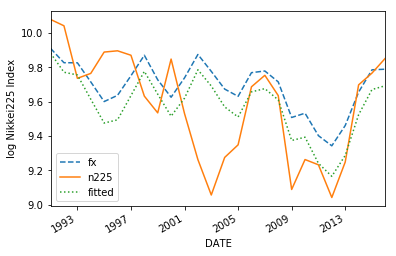

In [30]:
##バブル崩壊後のグラフ：ドル円の為替レート
(port1['1990/1/1':].fx+5).plot(label='fx',linestyle="--")
port1['1990/1/1':].n225.plot(label='n225')
results1_a.fittedvalues.plot(label='fitted',style=':')
plt.ylabel('log Nikkei225 Index')
plt.legend(loc='lower left')

In [46]:
#バブル崩壊後：細分化
def report(port):
    results1_a=(sm.OLS(port1_a.n225,port1_a.iloc[0:,1:]))\
    .fit()
    print("R-squared: ",results1_a.rsquared," F-pvalue: ",results1_a.f_pvalue," AIC: "\
          ,results1_a.aic," BIC: ",results1_a.bic)
    print("pvalues: ")
    print(results1_a.pvalues)
    from statsmodels.compat import lzip
    import statsmodels.stats.api as sms
    test=sms.jarque_bera(results1_a.resid)
    print("jbpv: ",test[1])
port1_a=port1['1990/1/1':'2000/1/1']
report(port1_a)

R-squared:  0.115621633784  F-pvalue:  0.650479158057  AIC:  -3.50191338891  BIC:  -2.59415810993
pvalues: 
const      0.214087
workpop    0.389031
gdpjpy     0.389031
fx         0.944725
dtype: float64
jbpv:  0.56559769705


In [47]:
#バブル崩壊後：細分化2
port1_a=port1.loc['2000/1/1':'2008/1/1']
report(port1_a)

R-squared:  0.471441222806  F-pvalue:  0.203110896317  AIC:  0.0197146289898  BIC:  0.258039254029
pvalues: 
const      0.116574
workpop    0.088538
gdpjpy     0.088538
fx         0.203805
dtype: float64
jbpv:  0.600673280078


In [48]:
#バブル崩壊後：細分化3
port1_a=port1.loc['2008/1/1':]
report(port1_a)

R-squared:  0.901528571233  F-pvalue:  0.00304281534924  AIC:  -9.06531656813  BIC:  -8.82699194309
pvalues: 
const      0.329385
workpop    0.309304
gdpjpy     0.309304
fx         0.014503
dtype: float64
jbpv:  0.723314910694
